## Mini Project 
By: Ludovica, Inés, Andrew

### Exercise 1 
Read the content of the file and generate the correspondent graph. Choose the right type of graph and decide what you want to do with edges weights.

To understand which type of graph to generate, we looked at the description of the network in the README: 

'Each student was asked to list his 5 best female and his 5 male friends. A node represents a student and an edge between two students shows that the left student chose the right student as a friend. Higher edge weights indicate more interactions and a 0 edge weight shows that there is no common activity at all.'

We decided to use a directed graph (nx.DiGraph) with weights associated with the edges. We decided to maintain the information on the weights to be able to identify which interactions occur more frequently and constitute, therefore, a greater risk factor during the pandemic. 

In [1]:
# the data is loaded using the .read() method, which returns the content of the whole text file
with open('../out.moreno_health_health', 'rb') as infile:
    data = infile.read()
    
type(data), len(data)

(bytes, 142441)

In order to understand how to convert the input data, we used the information on the README again:

'The adjacency matrix of the network is space separated values format, with one edge per line. The meaning of the columns in out.moreno_health are:

        First column: ID of from node 
        Second column: ID of to node
        Third column: edge weight'

In [2]:
# the string is split into the content of each line, which corresponds to one edge
edges = str(data).split('\\n')

#the first 2 and the last line contain additional information that we currently do not need, and will therefore discard
list_edges = [[]]*len(edges[2:-1])
for i in range(len(edges[2:-1])):
    list_edges[i] = edges[2+i].split(' ') #each line of data is transformed into a list containing 3 elements: ID of from node,                                          
                                          #ID of to node, edge weight
    
type(list_edges), len(list_edges)

(list, 12969)

As mentioned above, the created list of lists is converted into a directed graph with weights on its edges.

In [3]:
import networkx as nx

#instantiation of the directed graph
G = nx.DiGraph()

for lst in list_edges:
    G.add_edge(lst[0], lst[1], weight=float(lst[2])) #the first element is used a the from node, the second the to node 
                                                     #and the third as the weight   
len(G)

2539

In [4]:
# saving the network to create a visualization on Gephi
nx.write_gexf(G, "./saved_graph")

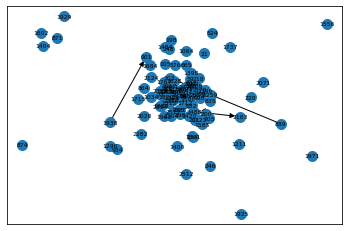

In [5]:
#since the complete visualization is too chaotic, we will visualize a random subgraph of the network
import random
randomlist = []
for i in range(100):
    n = random.randint(1,len(G))
    randomlist.append(str(n))
    
nx.draw_networkx(G.subgraph(randomlist), pos=nx.spring_layout(G), node_size=100, font_size=6) 

### Exercise 2
Given your knowledge of network analysis a school principal has approached you with the following query: "Given the current outbreak of Covid-19 we would like to secure our school. What could we do?". Use your knowledge to think about possible answers to the school principal. 

Write a short report (max 2 pages with pictures) in which you: 

(a) (2 points) Formalise the question you want to answer. The question the school principal asked is very vague. Try to make it formal enough to be studied using network theory. State the question clearly and explain why you think an answer to your question would be relevant.

(b) (6 points) Use one of the measures you have seen in the previous classes to answer the question. After you formalised your idea run some tests (you can use Python and/or Gephi) and write your endings. Make sure to present your data in a nice and understandable way. Gephi rendered graphs are welcome.

#### a) Question Formalisation

If the school principal is determined to keep the school open, we would like to, at least, slow down the rate at which the virus will spread, allowing the school to individuate and isolate the virus before the majority of the school contracts it. 

In order to do that, we will target the individuals who, due to their 'importance' in the graph, have the highest risk of spreading the virus. In so doing, we will individuate the hubs of the network (with respect to their risk factor) and evaluate whether distancing from the school these targeted individuals would be sufficient to prevent the virus from spreading too quickly. 

In other words, we will evaluate whether various degree centrality measures can detect the people with highest risk of spreading the virus. The results will be assessed on the base of how fast the virus spreads with and without these hubs and how much the distancing of these individuals from the school prevents the creation of the small world phenomenon.

To measure whether the velocity of the spread has been decreased sufficiently, we will use the following indicators:
- increased characteristic path length
- decreased how connected the graph is
- increased transitivity (favour closed groups of friends over open chains)
- increased clustering coefficient
- decreased the size and increased the number of connected components


The usefulness of this measure relies in the fact that an individual affected by the virus has an incubation period of two weeks at most. During these weeks, the virus can spread fast inside the school environment, threatening the health of a lot of families. Slowing down the spread, in conjunction with other distancing and sanitizing measures, gives the school time to individuate the problem and, using the contacts annotated in the network, trck the possibly infected individuals. 

##### The choice of measurements for the velocity of the spread

A *path length* is the average distance from a node to all other nodes. The *characteristic path length* represents the average of the path lengths of all nodes. Therefore, a graph which is less connected should have a greater characteristic path length because of the decrease of “path possibilities”. In terms of the spread of corona, a longer path lentgh signifies that, on average, the virus has to spread for more iterations in order to infect the whole school.

The network *density* refers to the ratio of the actual amount of connections over the total possible connections of the network. The removal of important nodes comes with the removal of all their connections and thus should be noticed in the decrease of the network’s density. With the lowered amount of connections, the spread will also lower.

*Transitivity* represents the proportion of triangles in the graph. In terms of people, it represents the amount of small communities in the graph. It can be regarded as less important in the spread of a virus overall but it can be used in combination with the other measures to understand how the spread will behave locally. In particular, removing important nodes should allow for more closed communities because it can be hypothesised that these nodes are the connectors between these small communities. Thus we should see an increased transitivity.

The *clustering coefficient* also measures the amount of small communities present in the graph. Therefore, by the same reasoning as transitivity, the removal of important nodes should lead to a small increase of the clustering coefficient.

A strongly connected graph is a graph where every node is reachable from every other node. A *strongly connected components* is a subgraph that is strongly connected. Therefore removing nodes that have a lot of connections should be measurable by the *increased amount* of strongly connected components and a *decrease of their size*. This is understandable because big strongly connected components will be broken down into smaller strongly connected components when nodes are removed, especially if these nodes have a lot of connections. Creating smaller and more numerous communities will limit the spread to the sigle, small, community and thus isolation the infection.



![alternative text](./graph-1.png)

*Figure 1: Gephi rendered figure of the original graph. The darker nodes have higher degree and the darker edges have higher weight.*

From the visualization, the graph shows one big strongly connected component on the top right, which will be to object of study for measures that require a connected graph (i.e. characteristic path length)

##### b) The choice of the centrality measure

In order to determine which centrality measure to use to identify the nodes with highest risk for the spread, we conducted three experiments. In each of the experiments we adopted one measure for centrality studied in class and we eliminated around 500 nodes that were considered most central to the network. We evaluated the results using the measures introduced above and the centrality measure that produced the greatest improvement was chosen. 

As a first step, let us take a look at the measures before any change is made to the network. This will provide a baseline that can be used to compare the results of the following parts. 

In [5]:
import numpy as np

char_path_length = nx.average_shortest_path_length(G)

pos_max = np.argmax([len(listElem) for listElem in sorted(nx.strongly_connected_components(G))])
char_path_length_component = [nx.average_shortest_path_length(G.subgraph(g)) for g in sorted(nx.strongly_connected_components(G))][pos_max]

density = nx.density(G)

transitivity = nx.transitivity(G)
clustering_coef = nx.average_clustering(G)

n_connected_comp = nx.number_strongly_connected_components(G)
size_connected_comp = sum([len(listElem) for listElem in sorted(nx.strongly_connected_components(G))])/len(sorted(nx.strongly_connected_components(G)))

print(f'original characteristic path length {char_path_length}, \noriginal characteristic path length of biggest component {char_path_length_component},,\noriginal network density {density},\noriginal transitivity {transitivity}, \noriginal average clustering coefficient {clustering_coef}, \noriginal number of strongly connected components {n_connected_comp}, \noriginal average size of a connected component {size_connected_comp}')

original characteristic path length 5.332392145105309, 
original characteristic path length of biggest component 6.246242139482579,,
original network density 0.00201257545412138,
original transitivity 0.14172739541160595, 
original average clustering coefficient 0.11988435473363211, 
original number of strongly connected components 368, 
original average size of a connected component 6.899456521739131


#### Experiment 1:

Using degree centrality to remove the most important nodes of the network:

In [14]:
deg_centrality = nx.degree_centrality(G)

We set, for each measure, a threshold which would allow to keep in average 2000 nodes and thus keep a descant amount of student in the school.

In [26]:
G_ = G.copy()

list_nodes = G.nodes()

for node in list_nodes:
    if deg_centrality[node] > 0.0057:
        G_.remove_node(node)
        
len(G), len(G_)

(2539, 2029)

In [27]:
pos_max = np.argmax([len(listElem) for listElem in sorted(nx.strongly_connected_components(G_))])
char_path_length = [nx.average_shortest_path_length(G_.subgraph(g_)) for g_ in sorted(nx.strongly_connected_components(G_))][pos_max]

density = nx.density(G_)

transitivity = nx.transitivity(G_)
clustering_coef = nx.average_clustering(G_)

n_connected_comp = nx.number_strongly_connected_components(G_)
size_connected_comp = sum([len(listElem) for listElem in sorted(nx.strongly_connected_components(G_))])/len(sorted(nx.strongly_connected_components(G_)))

print(f'new characteristic path length {char_path_length},\nnew network density {density},\nnew transitivity {transitivity}, \nnew average clustering coefficient {clustering_coef}, \nnew number of strongly connected components {n_connected_comp}, \nnew average size of a connected component {size_connected_comp}')

new characteristic path length 9.60861573737624,
new network density 0.0014075977225690992,
new transitivity 0.09462680099664175, 
new average clustering coefficient 0.09331630145119206, 
new number of strongly connected components 598, 
new average size of a connected component 3.3929765886287626


#### Experiment 2

Using betweenness centrality to remove the most important nodes of the network:

In [6]:
between_centrality = nx.betweenness_centrality(G)

In [7]:
G_ = G.copy()

list_nodes = G.nodes()

for node in list_nodes:
    if between_centrality[node] > 0.003:
        G_.remove_node(node)
        
len(G), len(G_)

(2539, 2066)

In [23]:
pos_max = np.argmax([len(listElem) for listElem in sorted(nx.strongly_connected_components(G_))])
char_path_length = [nx.average_shortest_path_length(G_.subgraph(g_)) for g_ in sorted(nx.strongly_connected_components(G_))][pos_max]

density = nx.density(G_)

transitivity = nx.transitivity(G_)
clustering_coef = nx.average_clustering(G_)

n_connected_comp = nx.number_strongly_connected_components(G_)
size_connected_comp = sum([len(listElem) for listElem in sorted(nx.strongly_connected_components(G_))])/len(sorted(nx.strongly_connected_components(G_)))

print(f'new characteristic path length {char_path_length},\nnew network density {density},\nnew transitivity {transitivity}, \nnew average clustering coefficient {clustering_coef}, \nnew number of strongly connected components {n_connected_comp}, \nnew average size of a connected component {size_connected_comp}')

new characteristic path length 11.052121089896275,
new network density 0.0015960002718990035,
new transitivity 0.1557345008208897, 
new average clustering coefficient 0.11663489914450567, 
new number of strongly connected components 621, 
new average size of a connected component 3.3268921095008053


#### Experiment 3

Using eigen vector centrality to remove the most important nodes of the network:

In [28]:
eigen_centrality = nx.eigenvector_centrality(G)

In [38]:
G_ = G.copy()

list_nodes = G.nodes()

for node in list_nodes:
    if eigen_centrality[node] > 0.0007:
        G_.remove_node(node)
        
len(G), len(G_)

(2539, 2038)

In [39]:
pos_max = np.argmax([len(listElem) for listElem in sorted(nx.strongly_connected_components(G_))])
char_path_length = [nx.average_shortest_path_length(G_.subgraph(g_)) for g_ in sorted(nx.strongly_connected_components(G_))][pos_max]

density = nx.density(G_)

transitivity = nx.transitivity(G_)
clustering_coef = nx.average_clustering(G_)

n_connected_comp = nx.number_strongly_connected_components(G_)
size_connected_comp = sum([len(listElem) for listElem in sorted(nx.strongly_connected_components(G_))])/len(sorted(nx.strongly_connected_components(G_)))

print(f'new characteristic path length {char_path_length},\nnew network density {density},\nnew transitivity {transitivity}, \nnew average clustering coefficient {clustering_coef}, \nnew number of strongly connected components {n_connected_comp}, \nnew average size of a connected component {size_connected_comp}')

new characteristic path length 7.261922540761944,
new network density 0.0018572021141752939,
new transitivity 0.1281623906184892, 
new average clustering coefficient 0.1168912756043287, 
new number of strongly connected components 412, 
new average size of a connected component 4.946601941747573


##### Results of the three experiments

Experiment 2 has obtained the greatest improvements when looking at our pre-determined metrics.

1. What does this tell us about who the 'risky individuals' are?

We have seen that the best way to improve the above parameters was to remove the individuals with a high betweenness centrality. Having a high betweenness centrality corresponds to participating in many shortest paths. Thus the most risky individuals in this specific graph are the social “hubs”, as they allow connections between many people. 
But why were the other measures less effective in the removal of individuals. It is obviously specific to this particular graph, but the degree centrality only informs us on the average amount of connections but not on the specific characteristics of these connections. Thus removing the individuals with a lot of connections could be less effective if these connections are not important (i.e. if it only links to one individual). However it is unclear why the eigenvector centrality was less effective in our case for it measures the influence of a node in the network.

2. What is the extent of this improvement and can we slow down the diffusion even further?

The amount of the improvement is significant especially for the parameters of the characteristic path length which went from 5.33 to 11.05. We also had a significant increase of the strongly connected components from 368 to 621 which came with a decrease of the average size of connected components from 6.90 to 3.33. The network density was also divided by two. Overall there was an improvement of factor 2 on almost all the parameters. This is a significant improvement, especially compared to the other measures. But it is unclear whether it will be enough to manage the spread of the virus. We are aware that we have adopted an approach which prioritises the most normal functioning of the school by keeping the maximum number of students in the school. 
To improve even further we could possibly remove more risky individuals from the graph. 

In the next section, we will adopt a last method to improve our results.

3. What can we do with these 'risky individuals'?

The risky individuals could be isolated for 2 or 3 weeks based on nowadays confinement policies for the coronavirus.

#### Experiment 4

Starting from the graph generated in Experiment 2, we would like to improve the performance even further. The idea is to use information given by the weights of the relationships. Relationships with weight 1 are not crucial and can therefore be avoided during times of emergency. 

Let us look, therefore, at what would happen if all the students avoided their relationships with weight 1.

In [11]:
#To see the format of the weights
list(G.edges.data('weight', default=1))[:2]

[('1', '2', 1.0), ('1', '3', 5.0)]

In [8]:
G__ = G_.copy()

list_edges = G_.edges()

for edge in list_edges:
    one = edge[0]
    two = edge[1]
    if G_[one][two]['weight'] < 2:
        G__.remove_edge(one, two)
        
len(G_.edges()), len(G__.edges())

(6809, 4992)

In [9]:
# saving the network to create a visualization on Gephi
nx.write_gexf(G__, "./final_graph")

In [61]:
pos_max = np.argmax([len(listElem) for listElem in sorted(nx.strongly_connected_components(G__))])
char_path_length = [nx.average_shortest_path_length(G__.subgraph(g_)) for g_ in sorted(nx.strongly_connected_components(G__))][pos_max]

density = nx.density(G__)

transitivity = nx.transitivity(G__)
clustering_coef = nx.average_clustering(G__)

n_connected_comp = nx.number_strongly_connected_components(G__)
size_connected_comp = sum([len(listElem) for listElem in sorted(nx.strongly_connected_components(G__))])/len(sorted(nx.strongly_connected_components(G__)))

print(f'new characteristic path length {char_path_length},\nnew network density {density},\nnew transitivity {transitivity}, \nnew average clustering coefficient {clustering_coef}, \nnew number of strongly connected components {n_connected_comp}, \nnew average size of a connected component {size_connected_comp}')

new characteristic path length 14.018846914586826,
new network density 0.0011701032981817927,
new transitivity 0.15276469796851877, 
new average clustering coefficient 0.11410290932664859, 
new number of strongly connected components 946, 
new average size of a connected component 2.1839323467230445


##### Results of Experiment 4

Experiment 4 led to an even better result than by removing only the risky individuals with high betweenness centrality: characteristic path length from 5.33 to 14.01; strongly connected components from 368 to 946 and average size of connected components from 6.90 to 2.18. 

However, for human friendships this is hard to implement because specific individuals would have to stop interacting with specific persons. For this reason, we believe that it would be ideal to isolate the 'risky individuals' and advice to limit relationships to only the closest ones.

ADD FIGURE OF FINAL GRAPH AND CONCLUSION

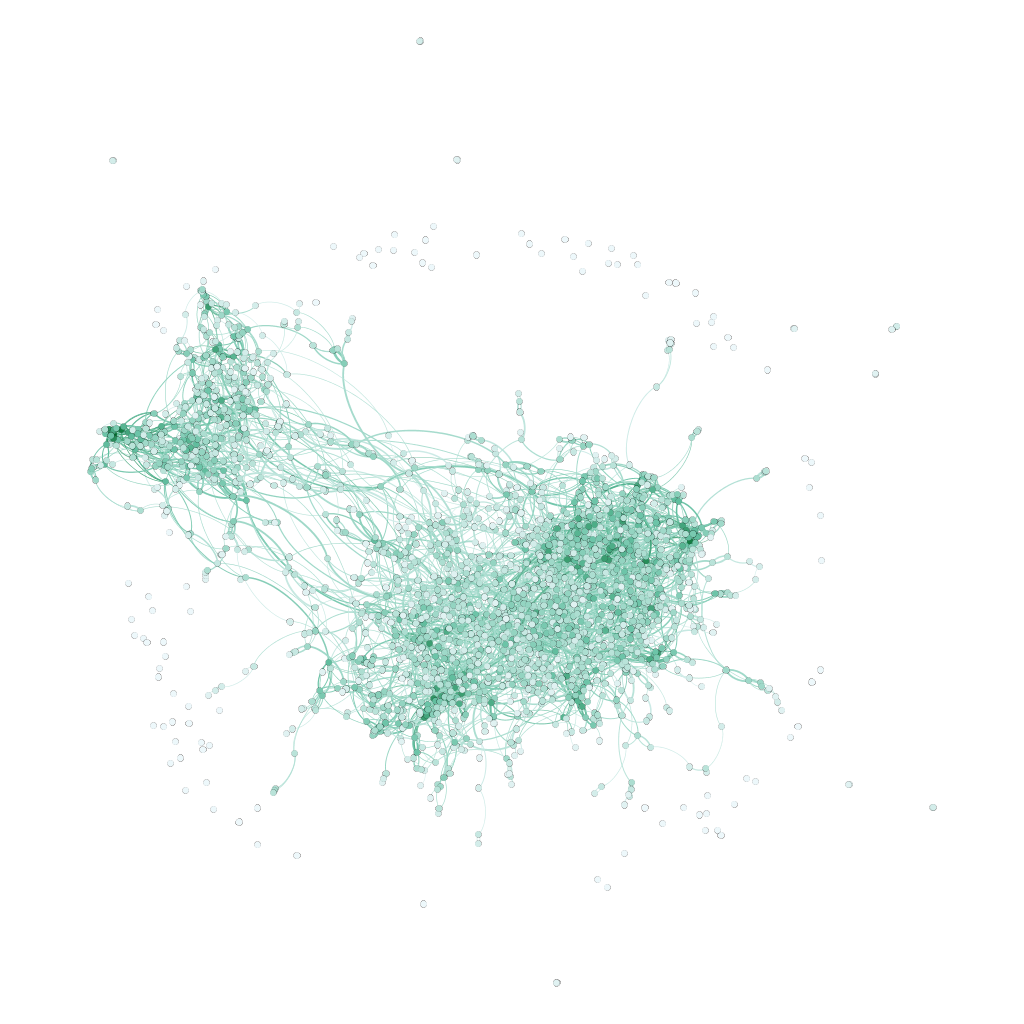

*Figure 2: Gephi rendered figure of the modified network. The darker nodes have higher degree and the darker edges have higher weight.*